<a href="https://colab.research.google.com/github/Pakhi27/Linear-Regression-pyTorch--Training-and-Validation-Data/blob/main/Linear_Regression_Training_and_Validation_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries we need for this lab, and set the random seed

from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim

In [ ]:
# Make Some Data¶
# First, we'll create some artificial data in a dataset class. The class will include the option to produce training data or validation data. The training data will include outliers.

In [2]:
# Create Data class

from torch.utils.data import Dataset, DataLoader

class Data(Dataset):

    # Constructor
    def __init__(self, train = True):
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]

            #outliers
            if train == True:
                self.y[0] = 0
                self.y[50:55] = 20
            else:
                pass

    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # Get Length
    def __len__(self):
        return self.len

In [ ]:
# Create two objects: one that contains training data and a second that contains validation data. Assume that the training data has the outliers.

In [3]:

# Create training dataset and validation dataset
train_data = Data()
val_data = Data(train = False)

In [ ]:
# Overlay the training points in red over the function that generated the data. Notice the outliers at x=-3 and around x=2:

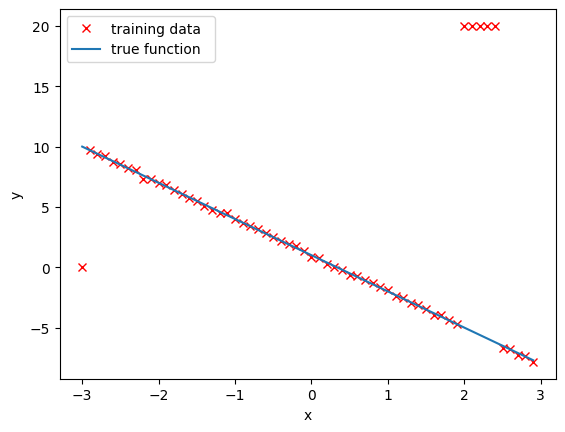

In [4]:
# Plot out training points

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr',label="training data ")
plt.plot(train_data.x.numpy(), train_data.f.numpy(),label="true function  ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# Create a Linear Regression Object, Data Loader, and Criterion Function

In [5]:
# Create Linear Regression Class

from torch import nn

class linear_regression(nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    # Prediction function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [ ]:
# Create the criterion function and a DataLoader object:

In [6]:
# Create MSELoss function and DataLoader

criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

In [ ]:
# Different learning rates and Data Structures to Store results for different Hyperparameters¶

In [ ]:
# Create a list with different learning rates and a tensor (can be a list) for the training and validating cost/total loss. Include the list MODELS, which stores the training model for every value of the learning rate.

In [7]:
# Create Learning Rate list, the error lists and the MODELS list

learning_rates=[0.0001, 0.001, 0.01, 0.1]

train_error=torch.zeros(len(learning_rates))
validation_error=torch.zeros(len(learning_rates))

MODELS=[]

In [ ]:
# Train different models for different Hyperparameters

In [8]:
# Define the train model function and train the model

def train_model_with_lr (iter, lr_list):

    # iterate through different learning rates
    for i, lr in enumerate(lr_list):
        model = linear_regression(1, 1)
        optimizer = optim.SGD(model.parameters(), lr = lr)
        for epoch in range(iter):
            for x, y in trainloader:
                yhat = model(x)
                loss = criterion(yhat, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        # train data
        Yhat = model(train_data.x)
        train_loss = criterion(Yhat, train_data.y)
        train_error[i] = train_loss.item()

        # validation data
        Yhat = model(val_data.x)
        val_loss = criterion(Yhat, val_data.y)
        validation_error[i] = val_loss.item()
        MODELS.append(model)

train_model_with_lr(10, learning_rates)

In [ ]:
# View the Results-Plot the training loss and validation loss for each learning rate:

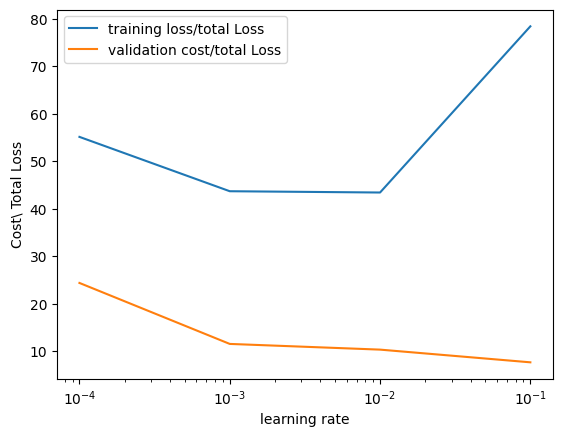

In [9]:
# Plot the training loss and validation loss

plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total Loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

In [ ]:
# Produce a prediction by using the validation data for each model:

0 [[0.7581643]
 [0.7372824]
 [0.7164005]]
1 [[5.850913 ]
 [5.7332945]
 [5.615676 ]]
2 [[6.63243  ]
 [6.4967318]
 [6.3610325]]
3 [[15.100572]
 [14.644274]
 [14.187975]]


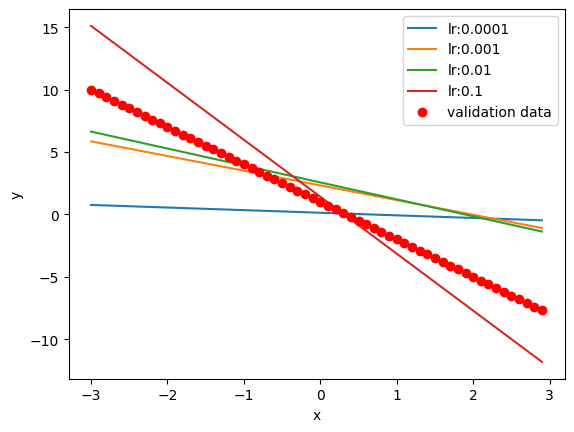

In [10]:
# Plot the predictions

i = 0
for model, learning_rate in zip(MODELS, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label = 'lr:' + str(learning_rate))
    print(i, yhat.detach().numpy()[0:3])
    i+=1
plt.plot(val_data.x.numpy(), val_data.f.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()